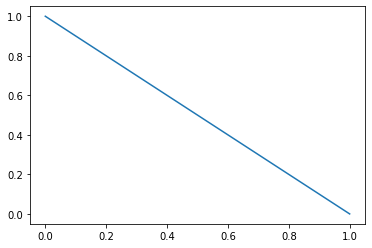

INFO:root:test
INFO:root:test


(-75, -56)
Import of badexp.ADEXPBackend failed due to:
No module named 'neuronunit.models.backends.badexp'
Import of bhh.BHHBackend failed due to:
No module named 'neuronunit.models.backends.bhh'
Import of general_pyNN.PYNNBackend failed due to:
No module named 'pyNN'


In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot([0,1],[1,0])
plt.show()
import hide_imports
from neuronunit.optimisation.optimization_management import inject_and_plot_model


In [2]:
def jrt(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = hide_imports.model_parameters.MODEL_PARAMS[backend]

    OM = hide_imports.OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM


def permutations(use_test,backend):
    use_test = hide_imports.TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]
    ga_out0 = use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True}, MU=2,NGEN=1)
    ga_out1 =  use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=1,seed_pop=ga_out0['pf'][0])

    
    dtc = ga_out1['pf'][0].dtc
    vm,plt = inject_and_plot_model(dtc.attrs,dtc.backend)

    return dtc, ga_out1['DO'], vm

In [3]:
test_frame = hide_imports.get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
stds = {}
for k,v in hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6']).items():
    temp = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])[k]
    stds[k] = temp.observation['std']
    print((temp.name,temp.observation))
OMObjects = []
backends = ["RAW"]#,"HH"]#,"ADEXP","BHH"]
#t = 
#for t in test_frame.values():
#    break
import copy
cloned_tests = copy.copy(test_frame['Neocortex pyramidal cell layer 5-6'])
import copy
for b in backends:        
    OM = jrt(cloned_tests,b)
    OMObjects.append(OM)
rt_outs = []

('RheobaseTest', {'mean': array(213.84958333) * pA, 'std': array(170.45245472) * pA, 'n': 32})
('InputResistanceTest', {'mean': array(120.67207364) * Mohm, 'std': array(77.63316083) * Mohm, 'n': 86})
('TimeConstantTest', {'mean': array(15.73424242) * ms, 'std': array(7.31162637) * ms, 'n': 33})
('CapacitanceTest', {'mean': array(150.58416667) * pF, 'std': array(139.68388463) * pF, 'n': 12})
('RestingPotentialTest', {'mean': array(-68.24814346) * mV, 'std': array(6.53234788) * mV, 'n': 79})
('InjectedCurrentAPWidthTest', {'mean': array(1.20769388) * ms, 'std': array(0.53434592) * ms, 'n': 49})
('InjectedCurrentAPAmplitudeTest', {'mean': array(80.43510204) * mV, 'std': array(12.74880304) * mV, 'n': 49})
('InjectedCurrentAPThresholdTest', {'mean': array(-42.73572327) * mV, 'std': array(8.04073233) * mV, 'n': 53})


In [4]:
for OM in OMObjects:
   print(OM.backend)
   x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
   cloned_tests = copy.copy(OM.tests)
   OM.tests = hide_imports.TSD(cloned_tests)
   rt_out = OM.simulate_data(OM.tests,OM.backend,OM.boundary_dict)
   print(rt_out)


RAW
{'value': array(133.20558071) * pA}
{'value': array(33591489.94003433) * kg*m**2/(s**3*A**2)}
{'value': array(5.30089068) * s}
{'value': array(1.57804572e-07) * s**4*A**2/(kg*m**2)}
{'mean': array(-63.1752743) * mV, 'std': array(2.84217094e-14) * mV}
{'mean': array(0.00031) * s, 'std': array(0.) * s, 'n': 1}
{'value': array([52.01584468]) * mV, 'mean': array(52.01584468) * mV, 'std': array(0.) * mV, 'n': 1}
{'mean': array(-12.01673959) * mV, 'std': array(0.) * mV, 'n': 1}
Random simulated data tests made
(<neuronunit.optimisation.data_transport_container.DataTC object at 0x7f6cf7b746d8>, {'RheobaseTest': <neuronunit.tests.fi.RheobaseTest object at 0x7f6cf7b0c940>, 'InputResistanceTest': <neuronunit.tests.passive.InputResistanceTest object at 0x7f6cf7b0c978>, 'TimeConstantTest': <neuronunit.tests.passive.TimeConstantTest object at 0x7f6cf7b0c9b0>, 'CapacitanceTest': <neuronunit.tests.passive.CapacitanceTest object at 0x7f6cf7b0c9e8>, 'RestingPotentialTest': <neuronunit.tests.passive

In [5]:
tests_final = hide_imports.TSD(test_frame['Neocortex pyramidal cell layer 5-6'])
for k,v in tests_final.items():
    temp = tests_final[k]

    v = rt_out[1][k].observation
    v['std'] = stds[k]


(AnalogSignal with 1 channels of length 130000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 1.3,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

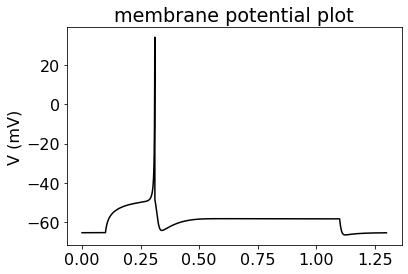

In [6]:
origin = rt_out[0]
origin.rheobase
inject_and_plot_model(origin.attrs,origin.backend)

In [7]:
ga_out =  hide_imports.TSD(tests_final).optimize(OMObjects[0].boundary_dict,backend=OMObjects[0].backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=8,NGEN=16)
opt = ga_out['pf'][0].dtc

In [8]:
opt.rheobase


array(281.14566207) * pA

(AnalogSignal with 1 channels of length 130000; units mV; datatype float64 
 sampling rate: 100.0
 time: 0.0 to 1.3,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

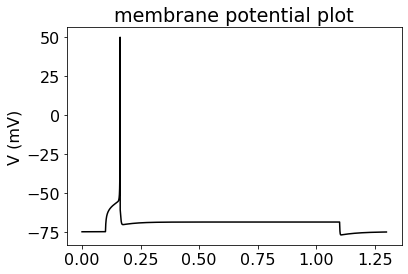

In [9]:
inject_and_plot_model(opt.attrs,opt.backend)

In [10]:
opt.obs_preds

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPWidthTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest,total
observations,133.20558071136475 pA,33591489.94003433 kg*m**2/(s**3*A**2),5.30089068051612 s,1.578045716334398e-07 s**4*A**2/(kg*m**2),-63.17527430005868 mV,0.00031 s,[52.015844681957105 mV],-12.016739592481885 mV,NaN
predictions,281.1456620693207 pA,18115490.389428146 kg*m**2/(s**3*A**2),2.34091328536798 s,1.2922163491274252e-07 s**4*A**2/(kg*m**2),-75.0 mV,0.00013000000000000002 s,69.65060320469891 mV,-19.650603204698918 mV,NaN
scores,0.867926,-0.199348,-404.832,-204.626,-1.81018,-0.33686,1.38325,-0.949399,615.004433
